# Importing Necessary Libraries And Dataset

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import random

In [2]:
data=pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

# Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [4]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# Data

In [5]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# From Data

In [6]:
print("Total number of unique Designations {}".format(len(data['Designation'].unique())))

Total number of unique Designations 419


In [7]:
print("Total number of unique job locations {}".format(len(data['JobCity'].unique())))

Total number of unique job locations 339


In [8]:
print("Total number of unique Specialization {}".format(len(data['Specialization'].unique())))

Total number of unique Specialization 46


In [9]:
print("Total number of unique Degree {}  {}".format(len(data['Degree'].unique()),data['Degree'].unique()))

Total number of unique Degree 4  ['B.Tech/B.E.' 'MCA' 'M.Tech./M.E.' 'M.Sc. (Tech.)']


In [10]:
print("Total number of unique CollegeState {}".format(len(data['CollegeState'].unique())))

Total number of unique CollegeState 26


# Visualization Functions


In [11]:
def k_de(d,kde_status):
    fig=plt.figure(figsize=(8,8))
    ax = sns.displot(data[d],kde=kde_status)
    plt.title("distribution of {}".format(d))

def logNorm(d):
    fig=plt.figure(figsize=(8,8))
    plt.hist(np.log1p(data[d]));
    plt.title("distribution of log of {}".format(d))

def countplot(d):
    fig=plt.figure(figsize=(10,10))    
    ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[:13].index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    if any(data[d].value_counts().iloc[13:].index):
        fig=plt.figure(figsize=(10,10))
        ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[13:26].index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        plt.show()
    if any(data[d].value_counts().iloc[26:40].index):
        fig=plt.figure(figsize=(10,10))
        ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[40:50].index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()        
        plt.show()    
    if any(data[d].value_counts().iloc[50:].index):
        fig=plt.figure(figsize=(10,10))
        ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[50:].index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()        
        plt.show()   
    
def hist(d):
    fig=plt.figure(figsize=(8,8))
    plt.hist(data[d]);
    plt.title("histogram of {}".format(d))

def boxplot2(c1,c2):
    fig=plt.figure(figsize=(8,8))    
    sns.boxplot(x=c1,y=c2, data=data)

def boxplot1(c1):
    fig=plt.figure(figsize=(8,8))    
    sns.boxplot(x=c1,data=data)    

def countploth(d):
    fig,ax = plt.subplots(1,1,figsize=(25,20))
    sns.countplot(data=data,x=d,hue='Gender')
    plt.xticks(rotation=90)
    plt.show()

# column seperation based on type

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericdata = data.select_dtypes(include=numerics)
numerical_col=numericdata.columns

In [13]:
categorical_col=list(set(data.columns)-set(numerical_col))

In [14]:
len(categorical_col)

12

In [15]:
len(numerical_col)

27

# Visualizations

### UNIVARIATE ANALYSIS

KDE, HISTOGRAM , LOGNORMAL and BOXPLOT 

<Figure size 576x576 with 0 Axes>

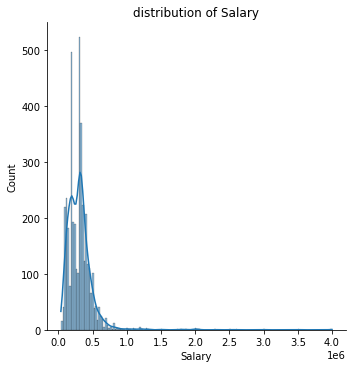

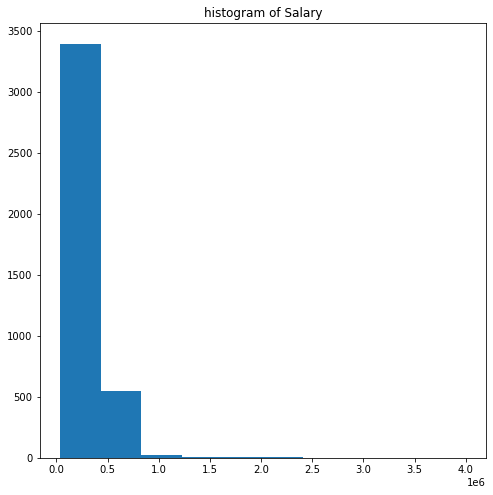

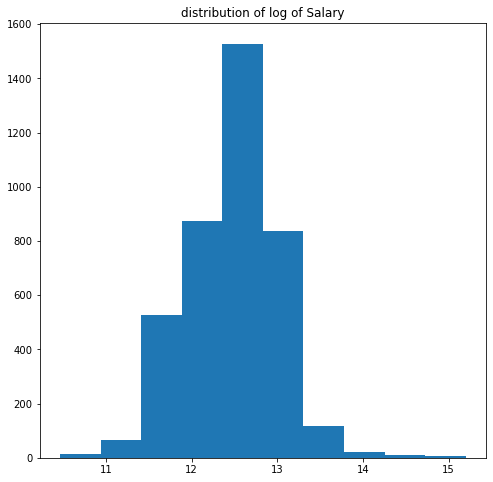

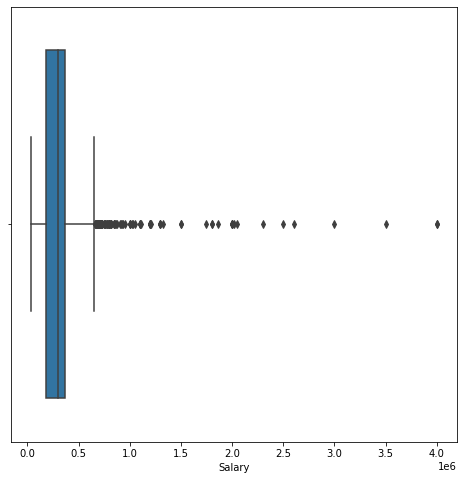

In [16]:
k_de('Salary',True)
hist('Salary')
logNorm('Salary')
boxplot1('Salary')

<Figure size 576x576 with 0 Axes>

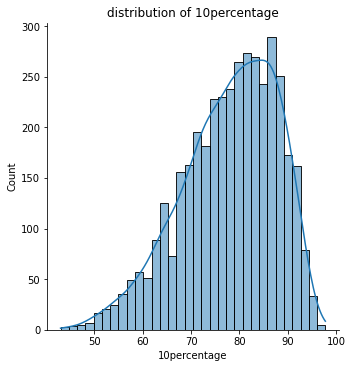

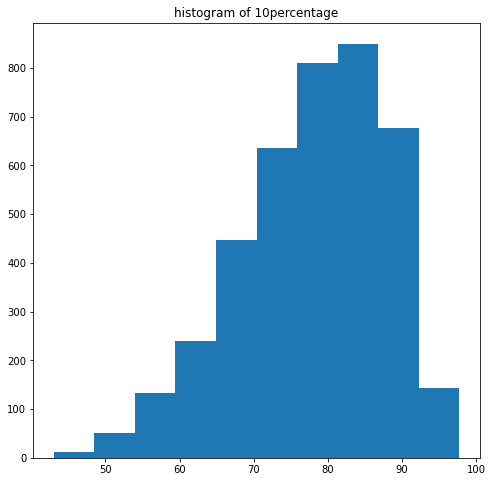

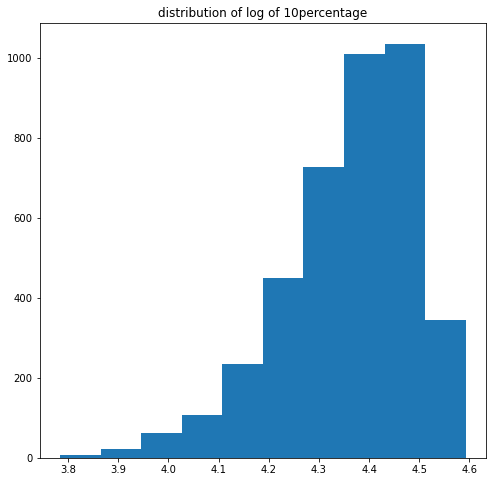

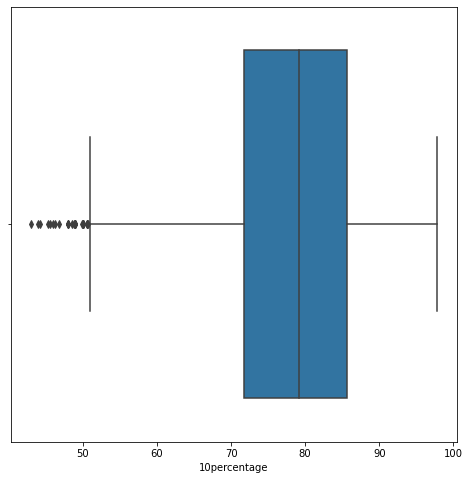

In [17]:
k_de('10percentage',True)
hist('10percentage')
logNorm('10percentage')
boxplot1('10percentage')

<Figure size 576x576 with 0 Axes>

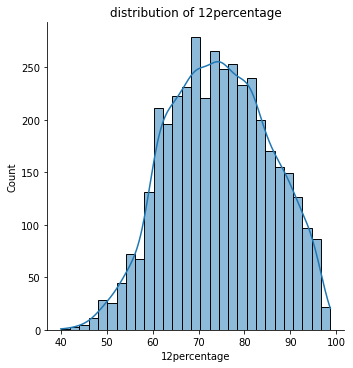

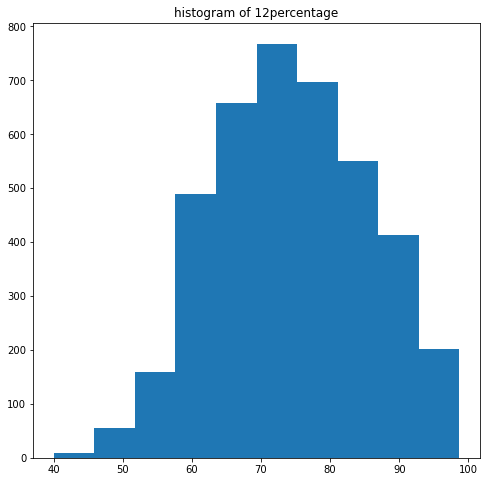

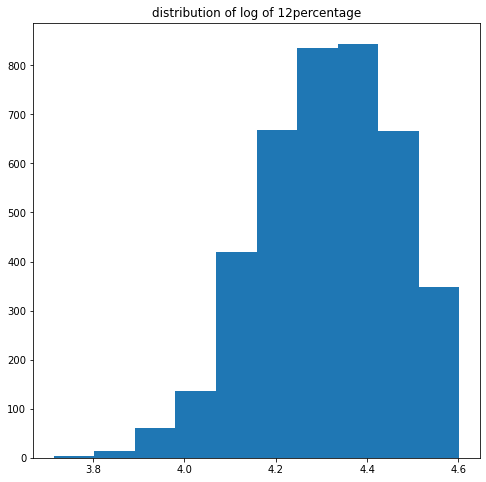

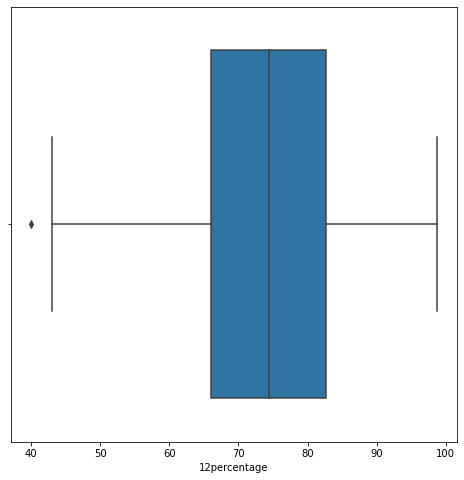

In [18]:
k_de('12percentage',True)
hist('12percentage')
logNorm('12percentage')
boxplot1('12percentage')

<Figure size 576x576 with 0 Axes>

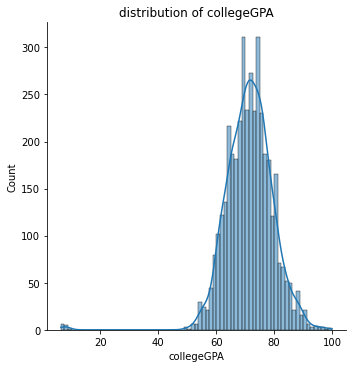

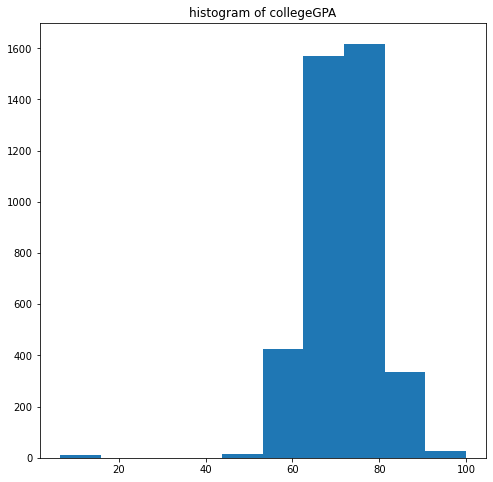

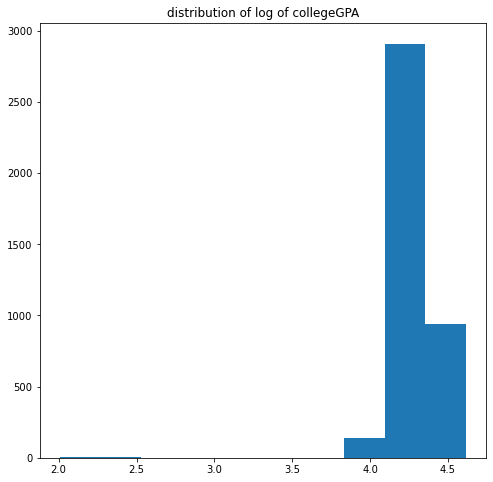

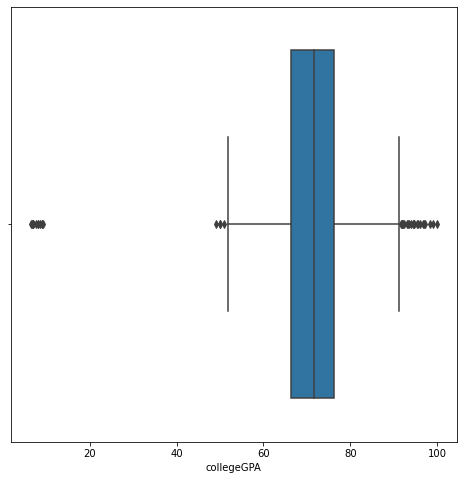

In [19]:
k_de('collegeGPA',True)
hist('collegeGPA')
logNorm('collegeGPA')
boxplot1('collegeGPA')

<Figure size 576x576 with 0 Axes>

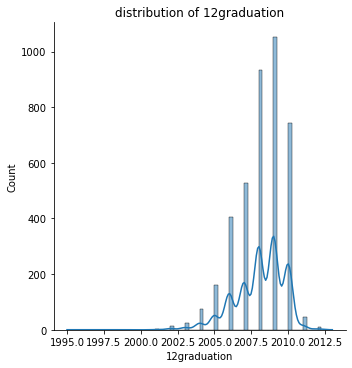

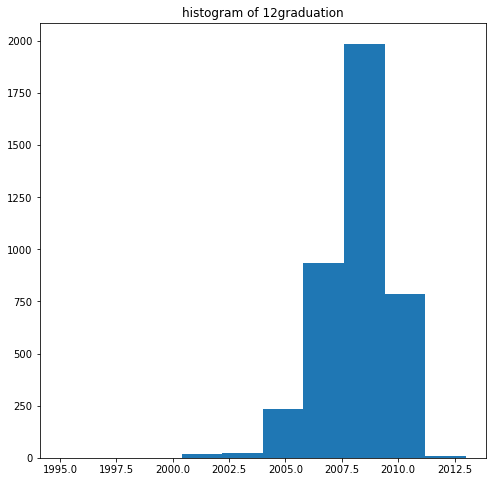

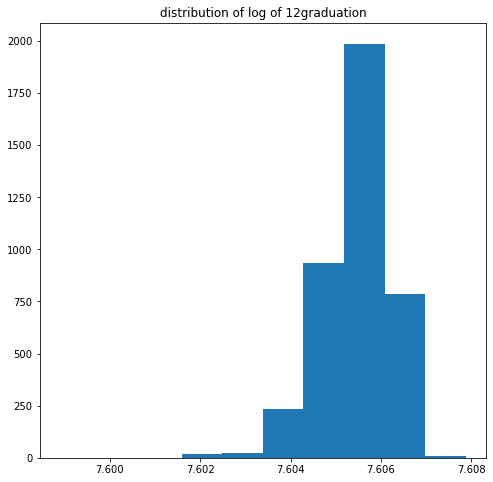

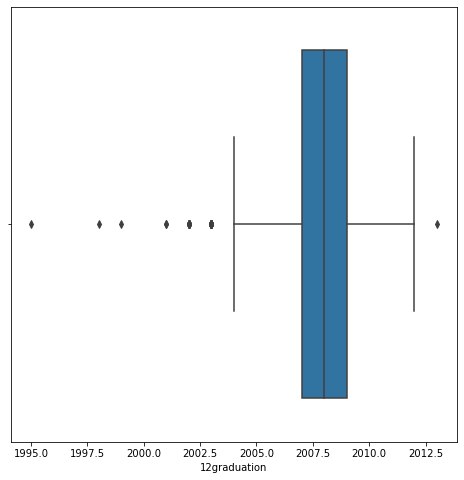

In [20]:
k_de('12graduation',True)
hist('12graduation')
logNorm('12graduation')
boxplot1('12graduation')

<Figure size 576x576 with 0 Axes>

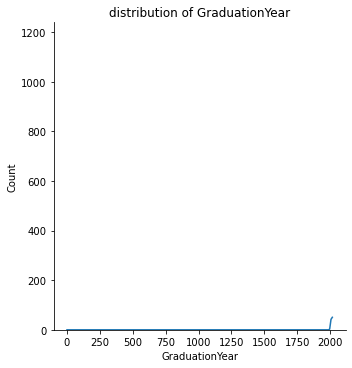

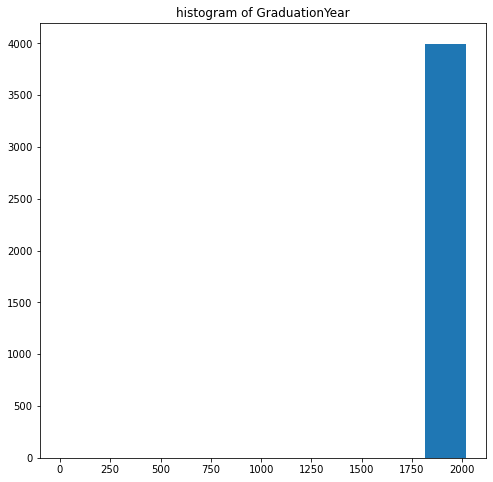

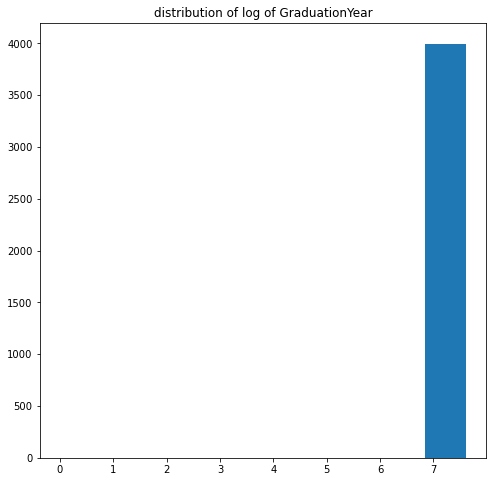

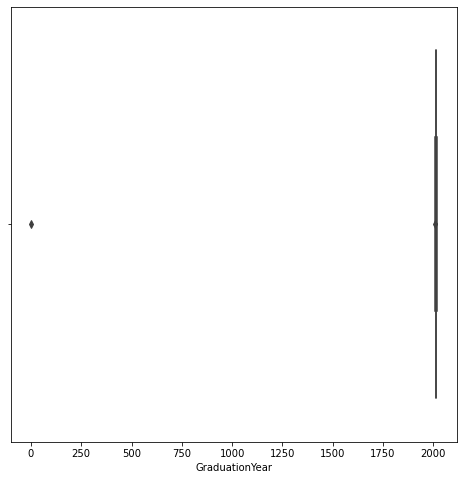

In [21]:
k_de('GraduationYear',True)
hist('GraduationYear')
logNorm('GraduationYear')
boxplot1('GraduationYear')

In [22]:
numerical_col

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

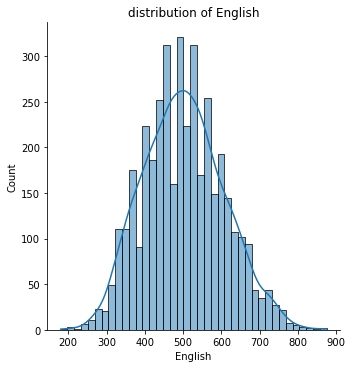

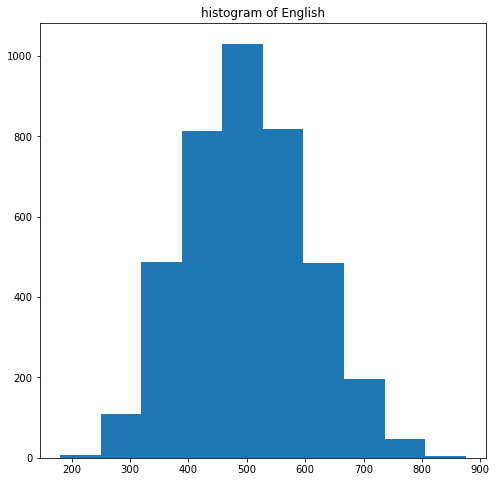

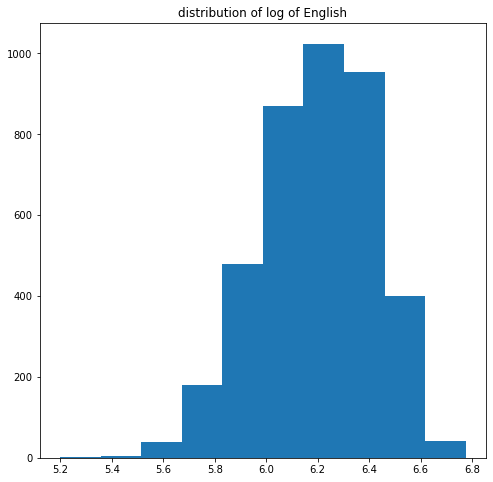

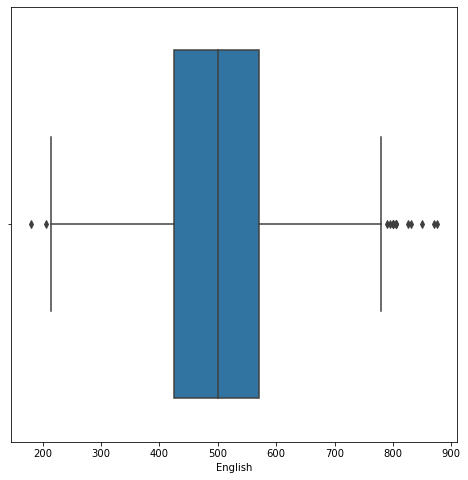

In [23]:
k_de('English',True)
hist('English')
logNorm('English')
boxplot1('English')

<Figure size 576x576 with 0 Axes>

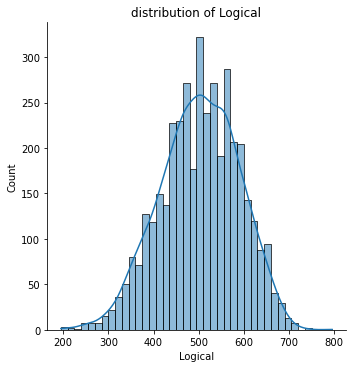

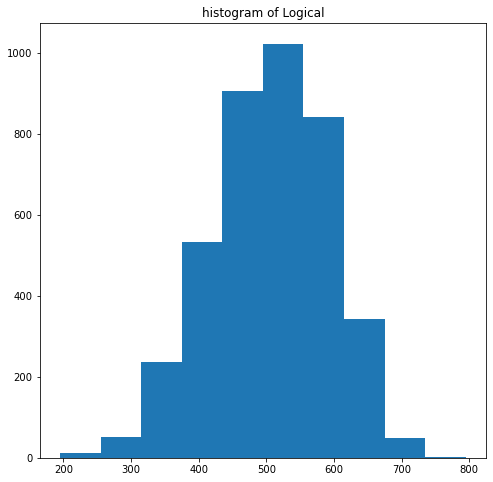

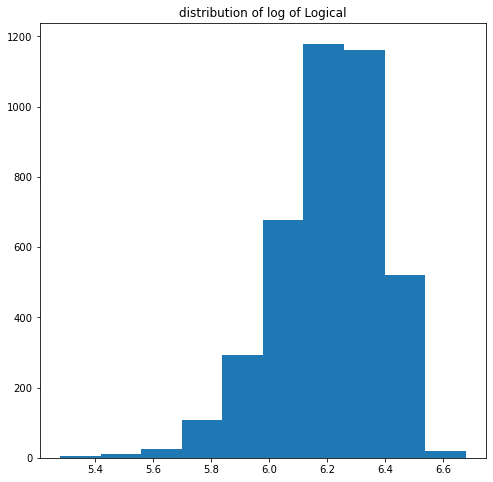

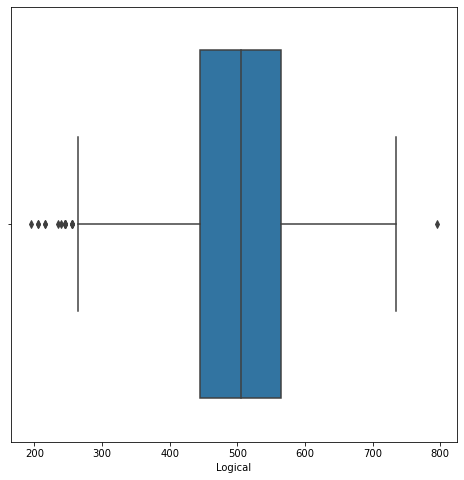

In [24]:
k_de('Logical',True)
hist('Logical')
logNorm('Logical')
boxplot1('Logical')

<Figure size 576x576 with 0 Axes>

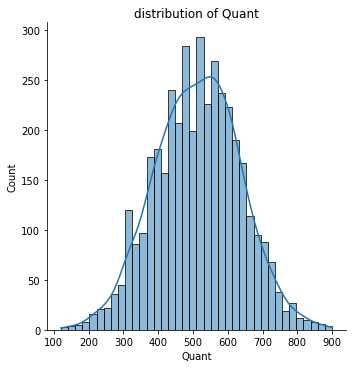

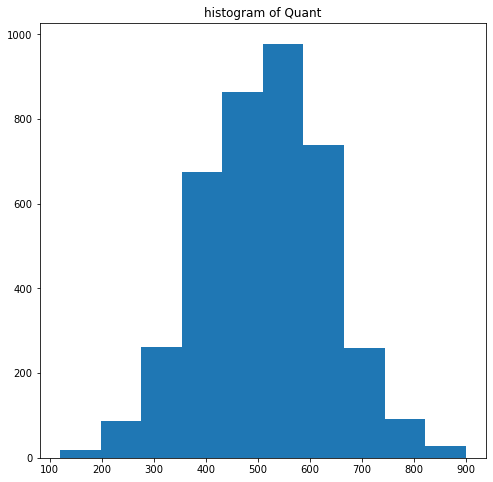

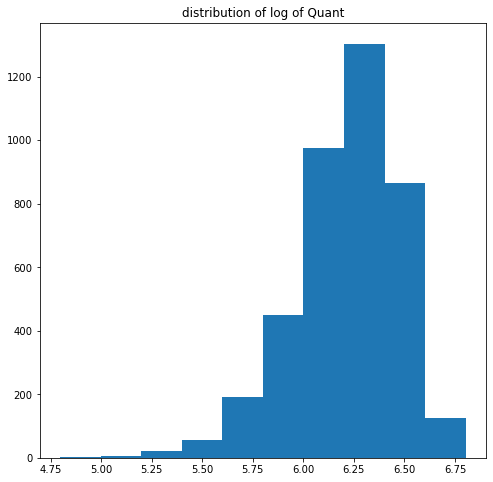

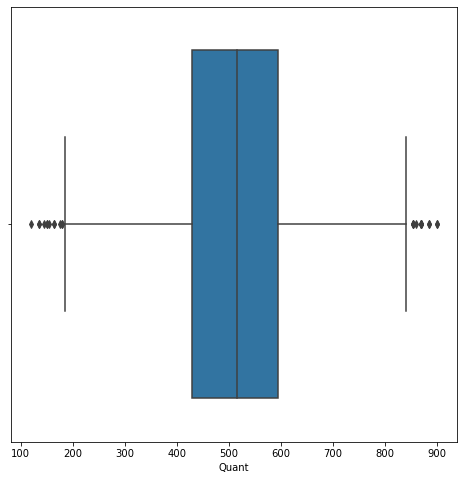

In [25]:
k_de('Quant',True)
hist('Quant')
logNorm('Quant')
boxplot1('Quant')

<Figure size 576x576 with 0 Axes>

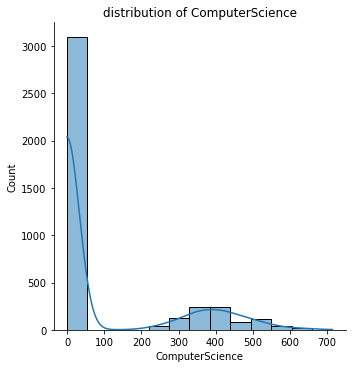

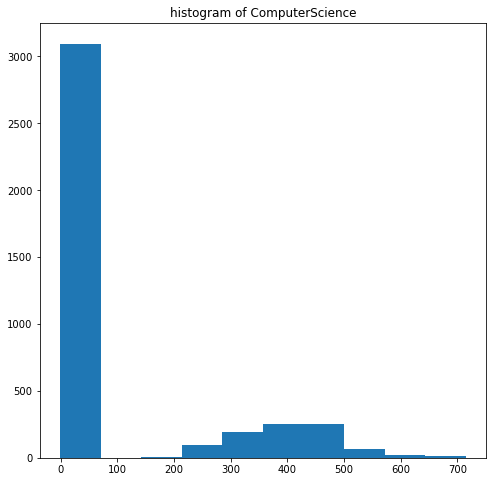

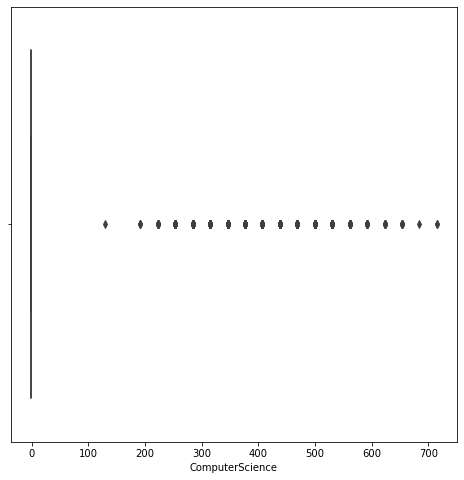

In [26]:
k_de('ComputerScience',True)
hist('ComputerScience')
boxplot1('ComputerScience')

<Figure size 576x576 with 0 Axes>

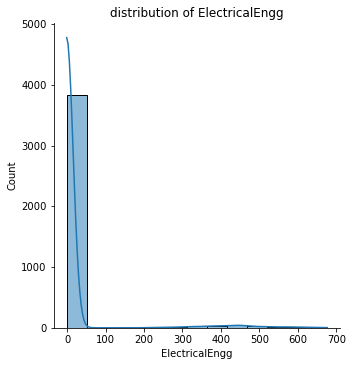

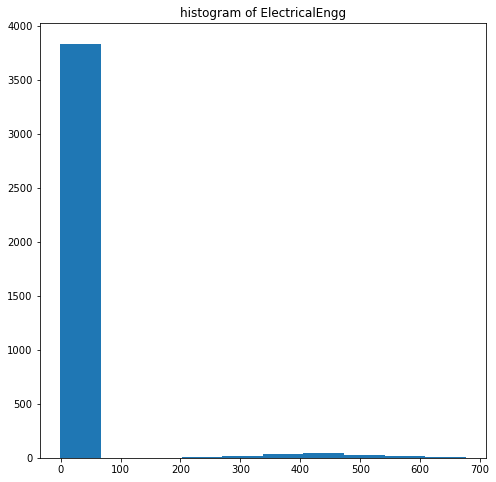

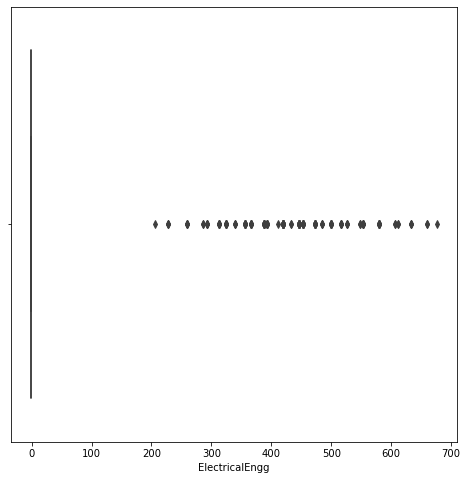

In [27]:
k_de('ElectricalEngg',True)
hist('ElectricalEngg')
boxplot1('ElectricalEngg')

COUNTPLOTS

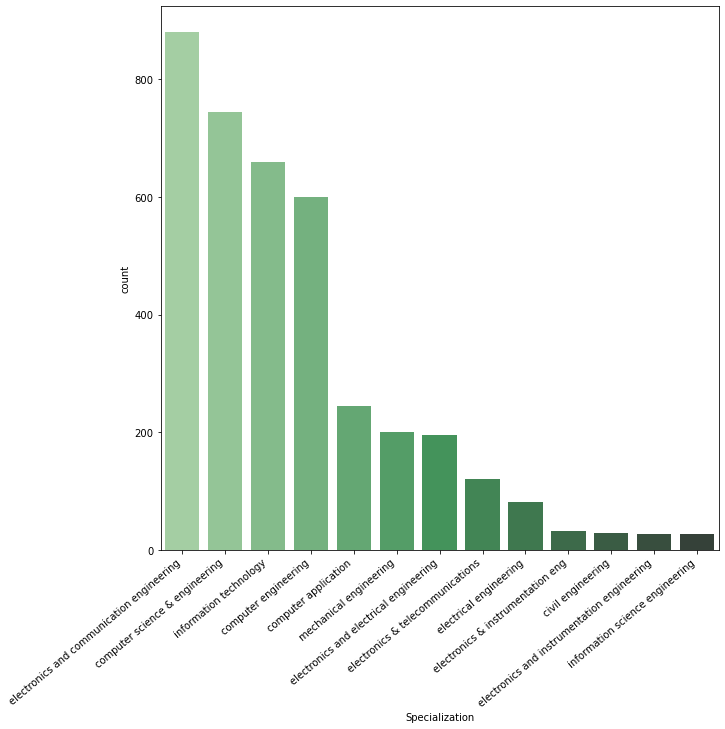

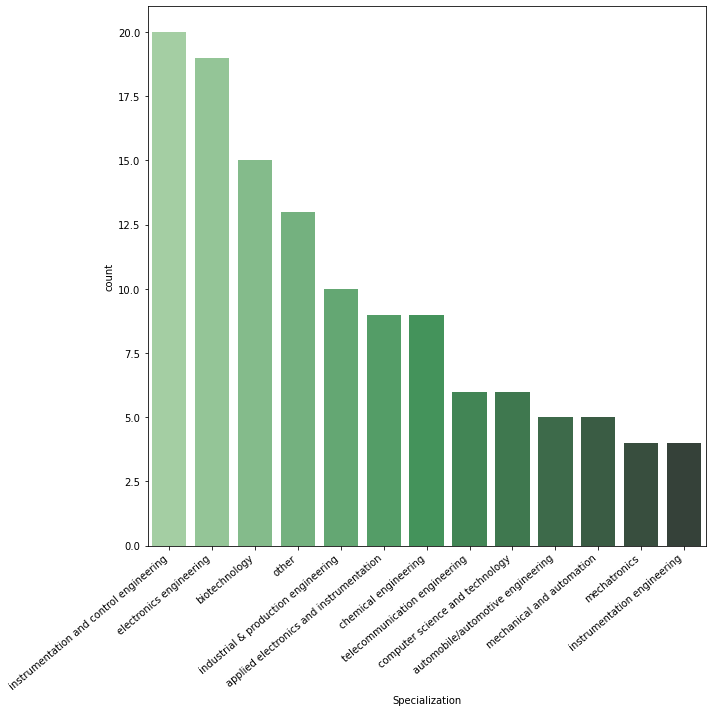

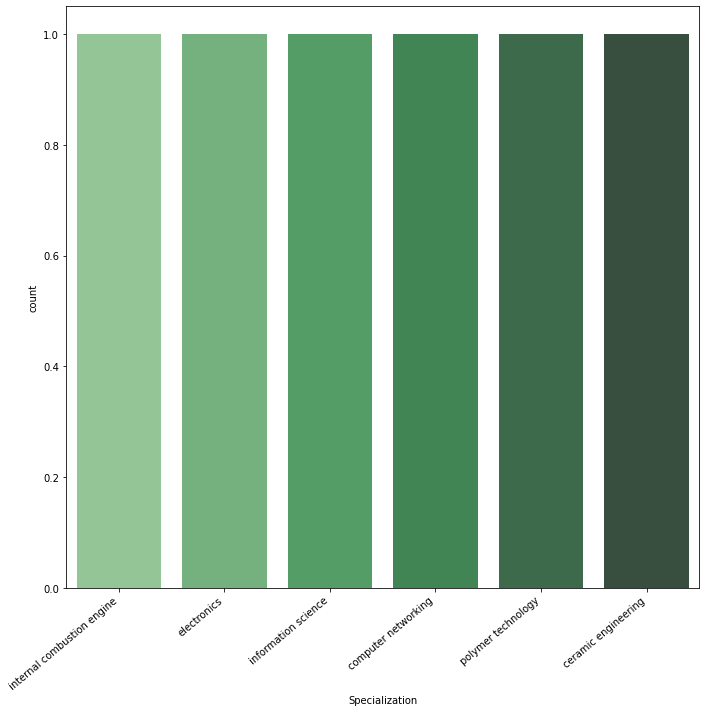

In [28]:
countplot('Specialization')

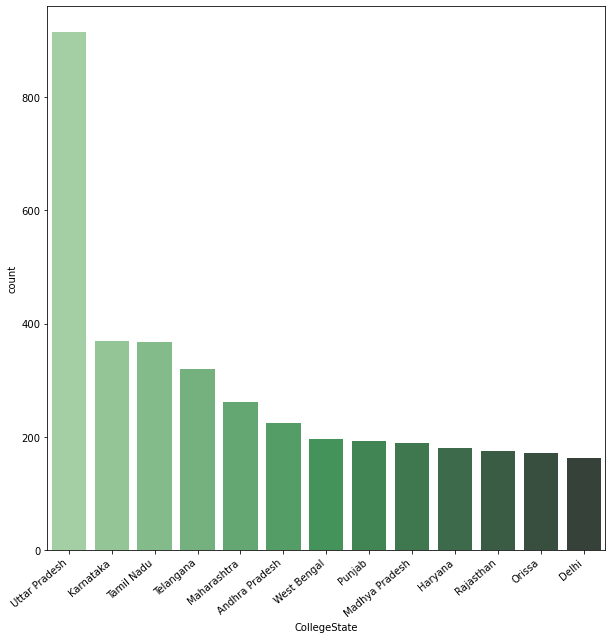

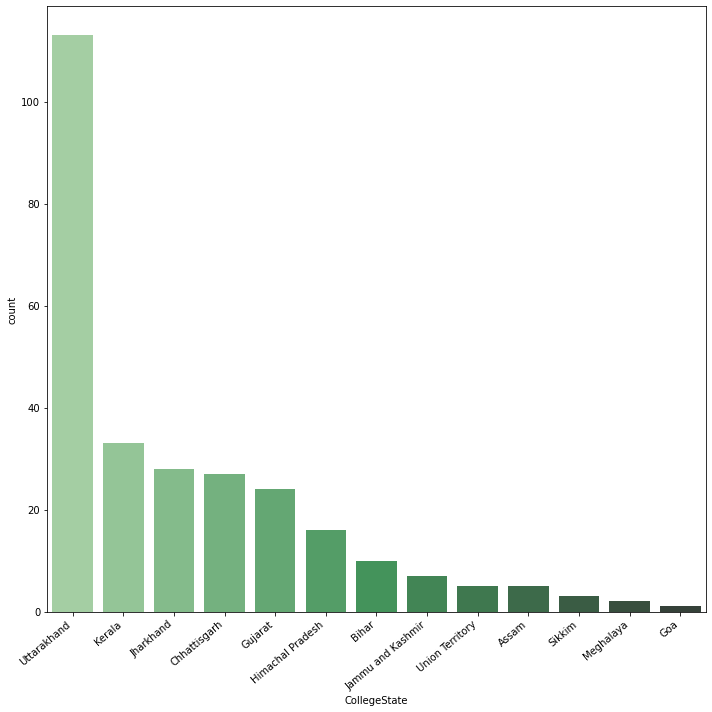

In [29]:
countplot('CollegeState')

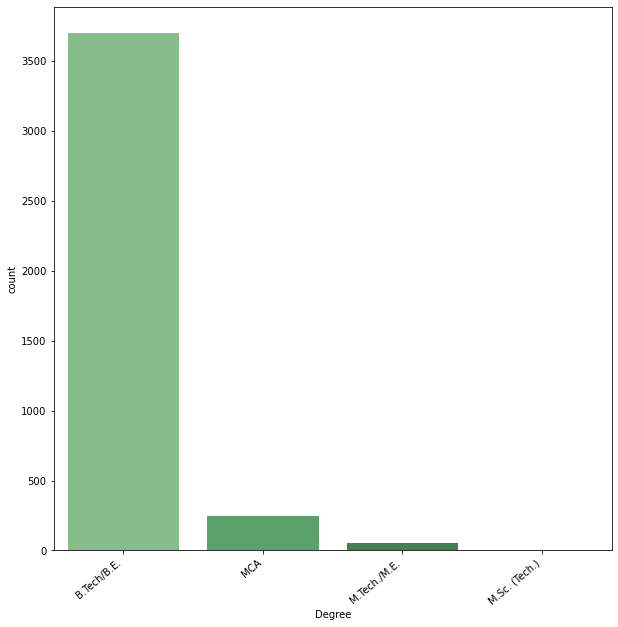

In [30]:
countplot('Degree')

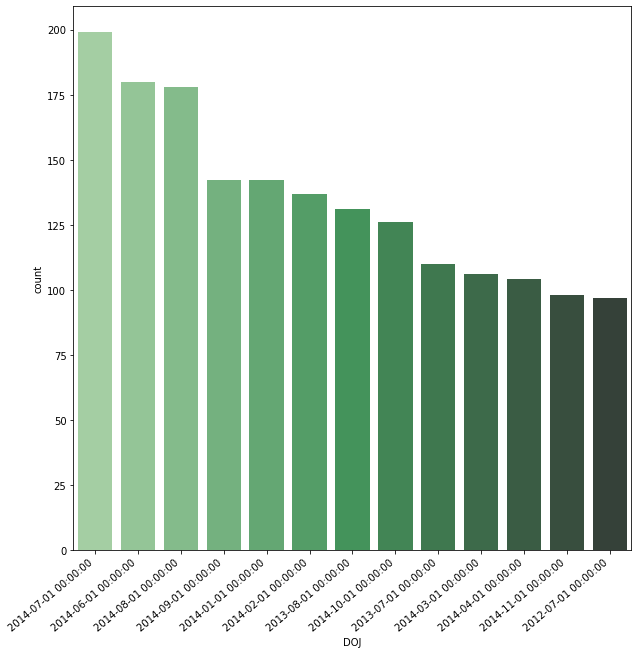

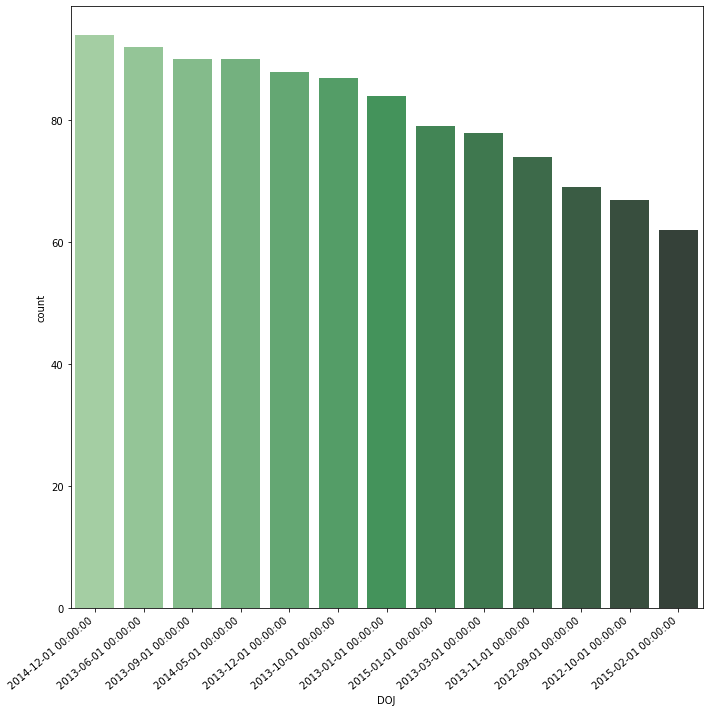

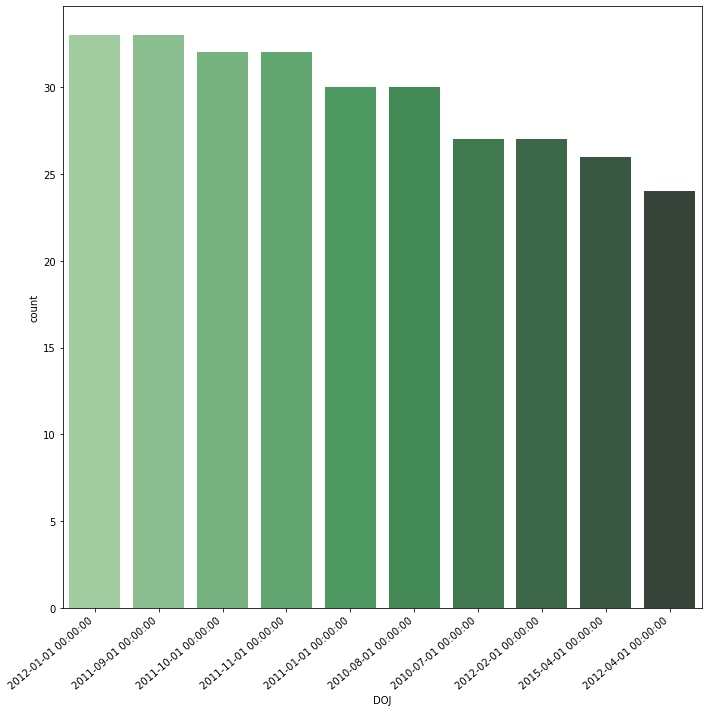

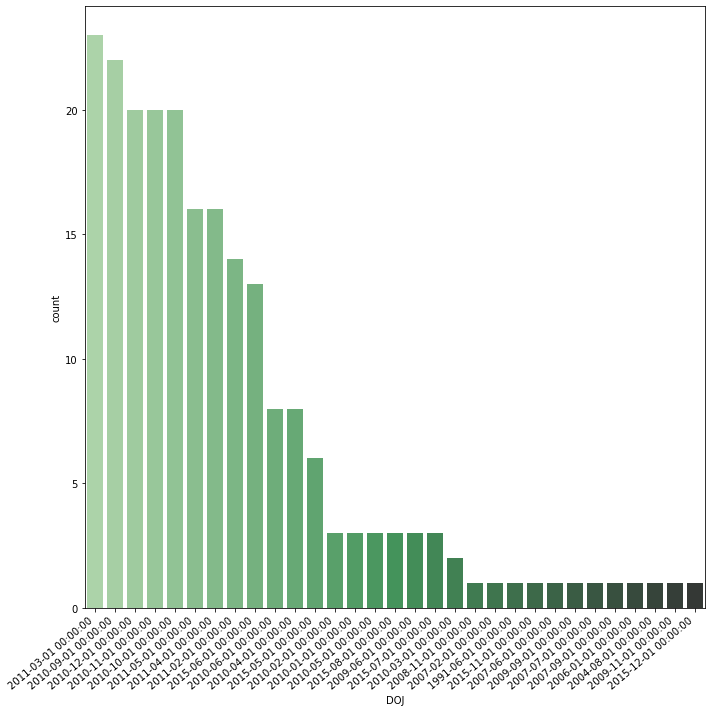

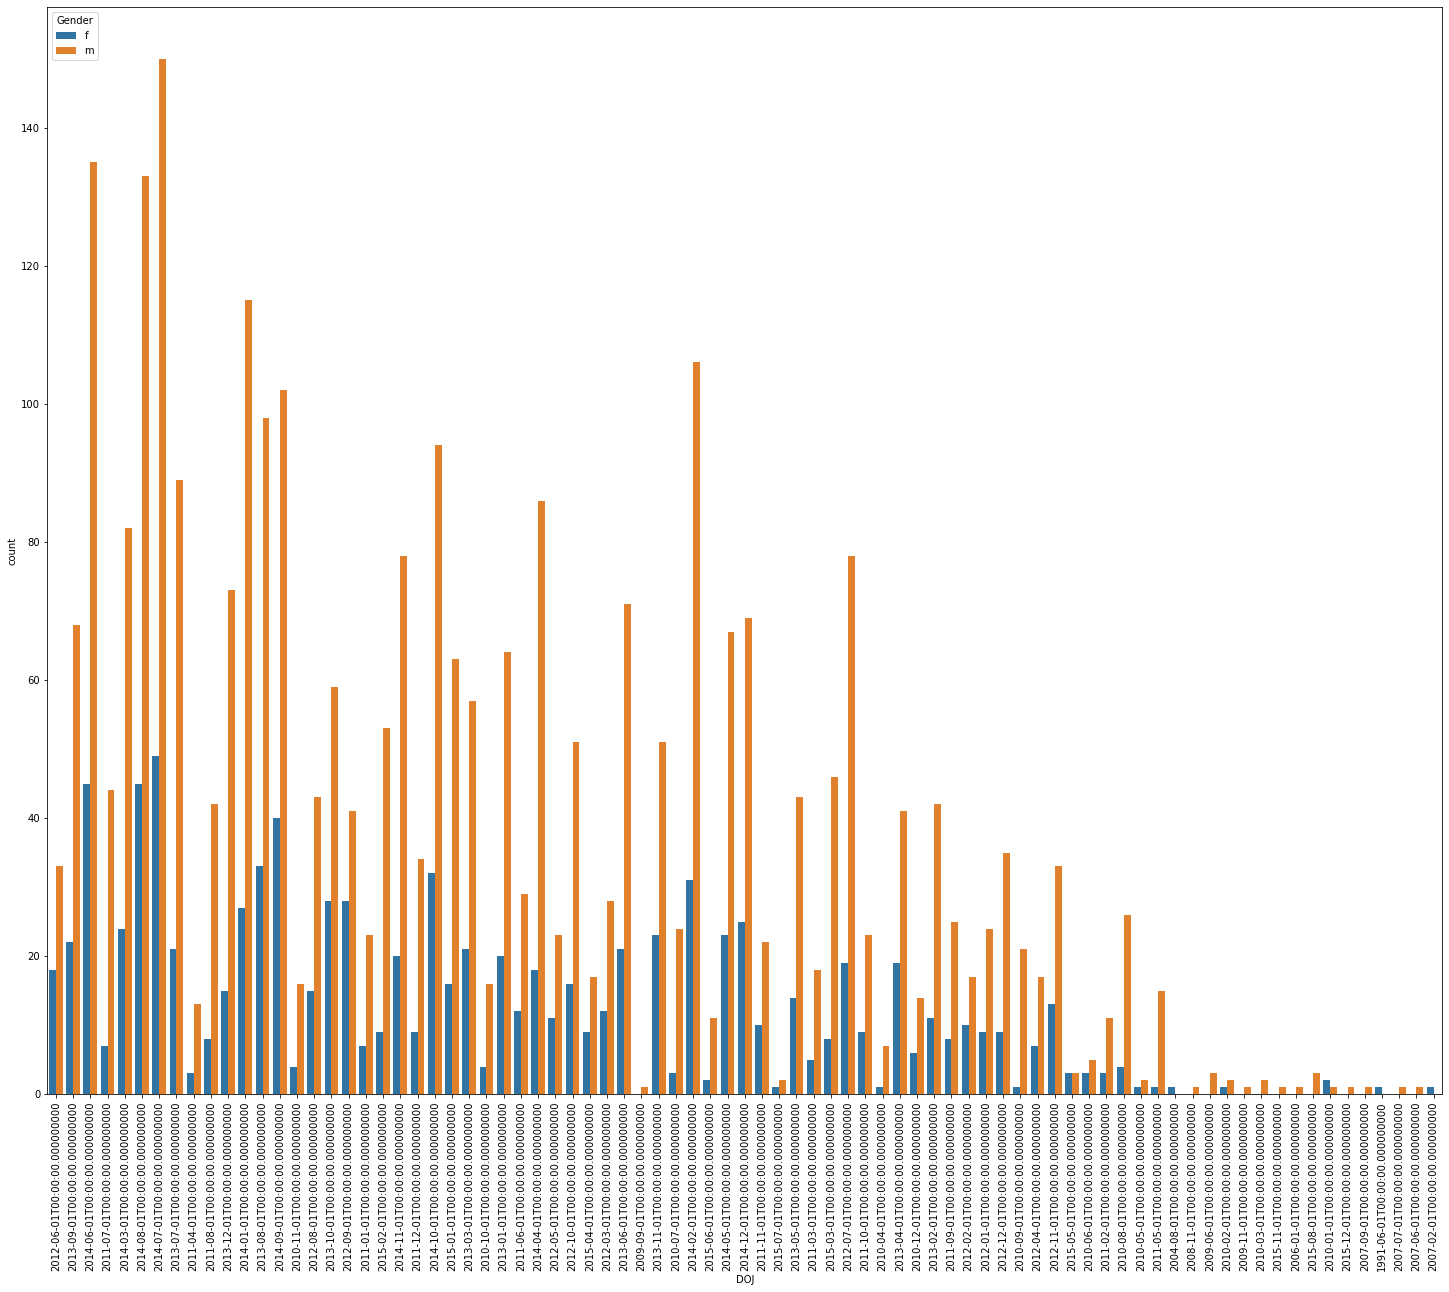

In [31]:
countplot('DOJ')
countploth('DOJ')


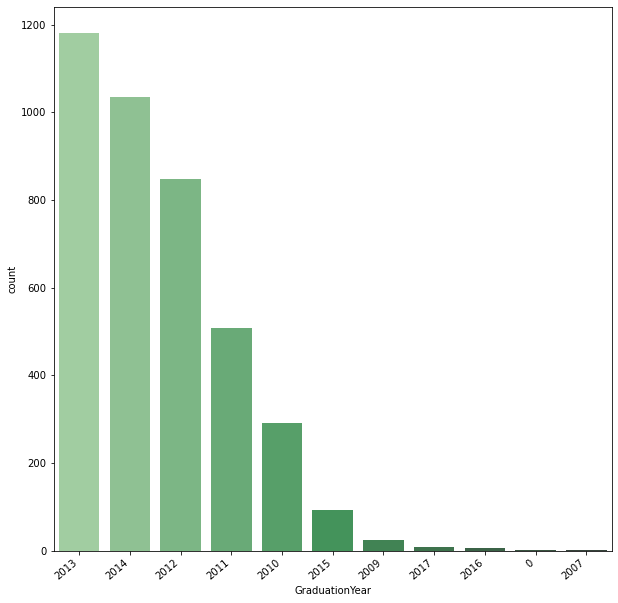

In [32]:
countplot('GraduationYear')


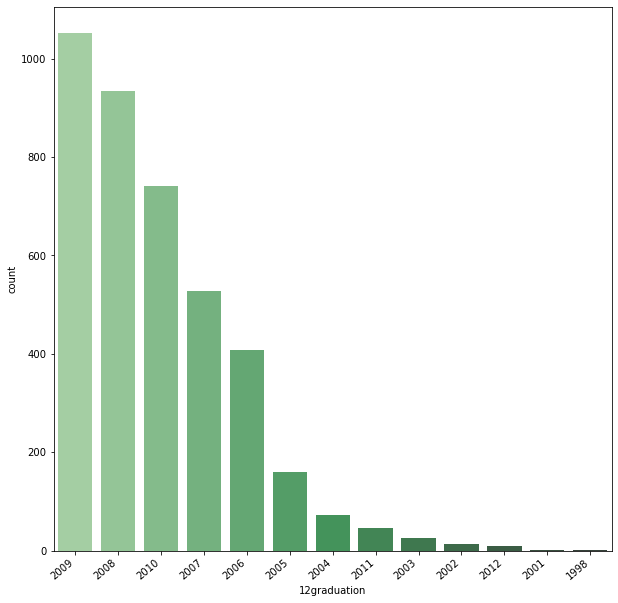

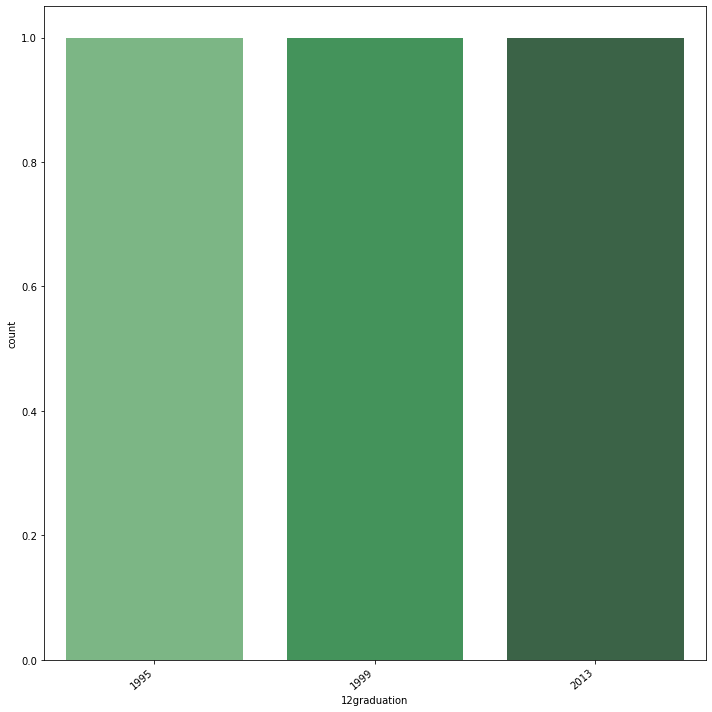

In [33]:
countplot('12graduation')


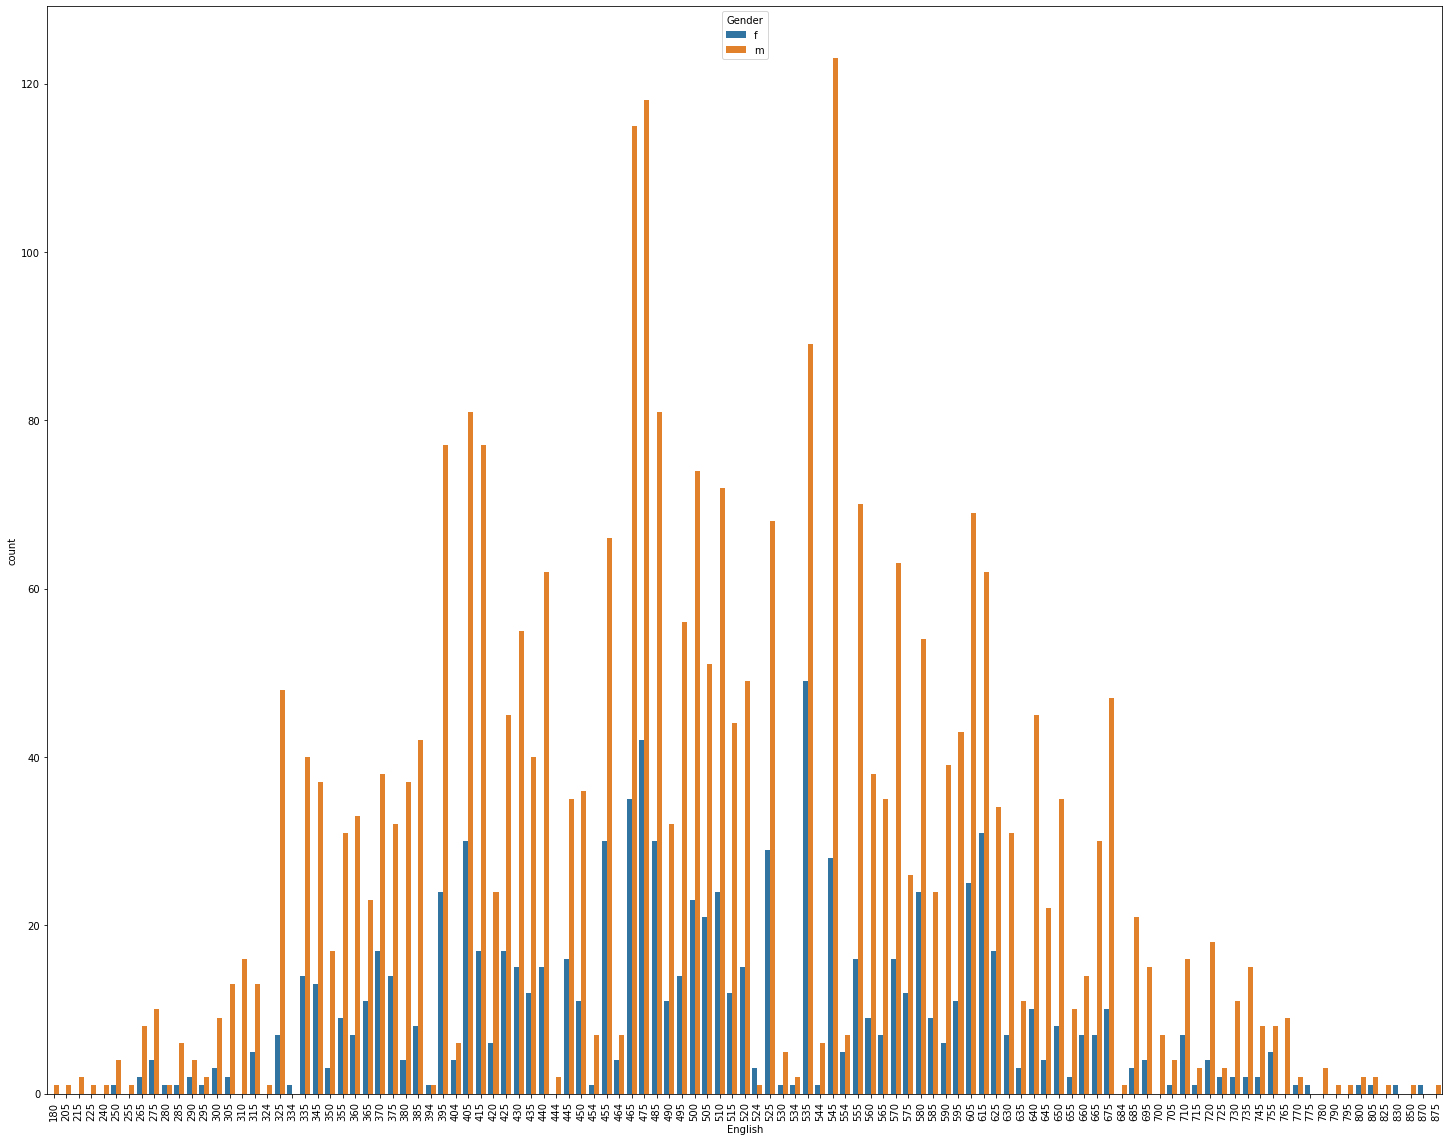

In [34]:
countploth('English')

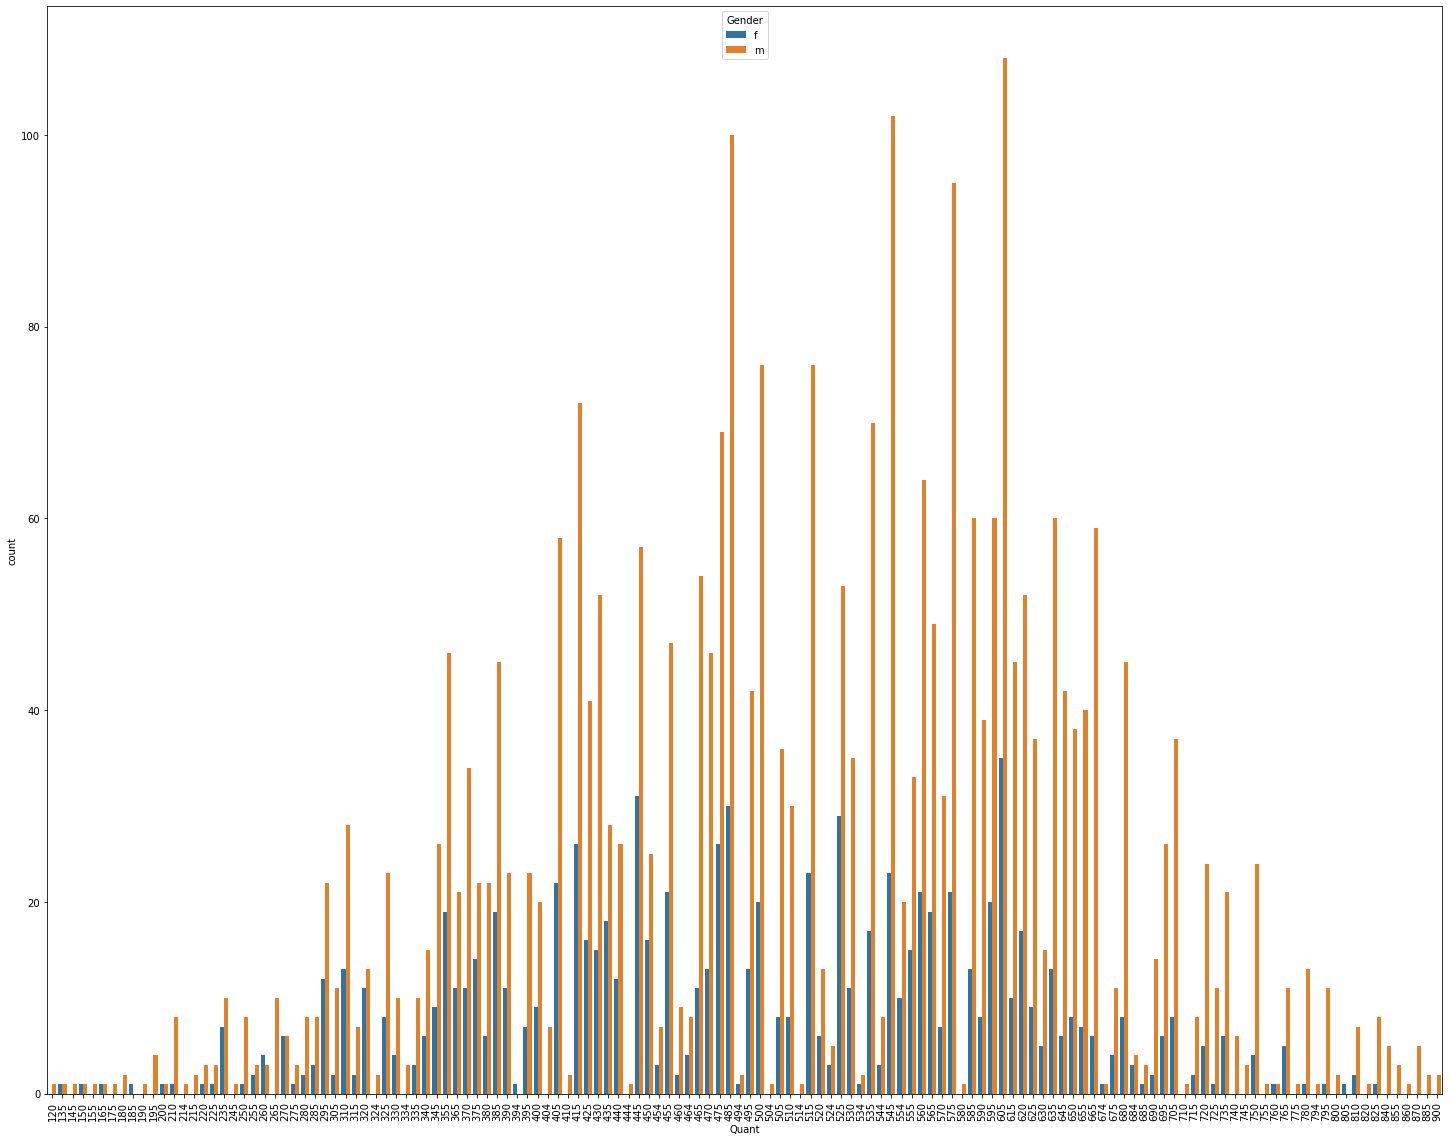

In [35]:
countploth('Quant')

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='collegeGPA', ylabel='GraduationYear'>

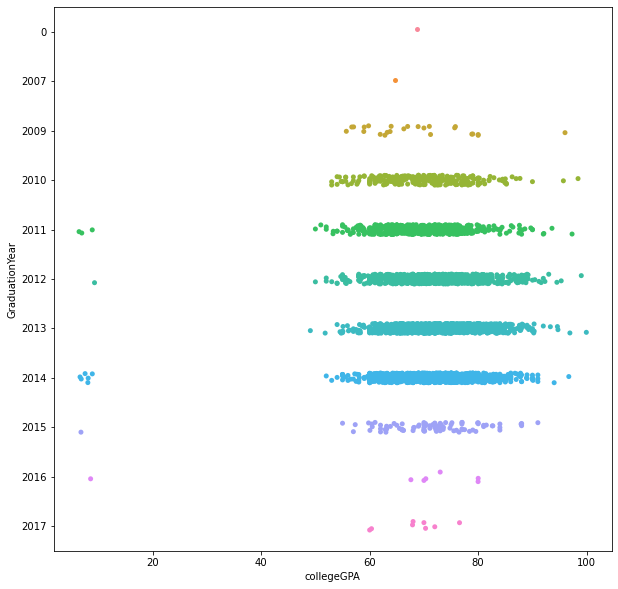

In [36]:
fig=plt.figure(figsize=(10,10))    
sns.stripplot(y = "GraduationYear", x = "collegeGPA", 
              orient = "h", data = data)

In [37]:
subjects=[ 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg']

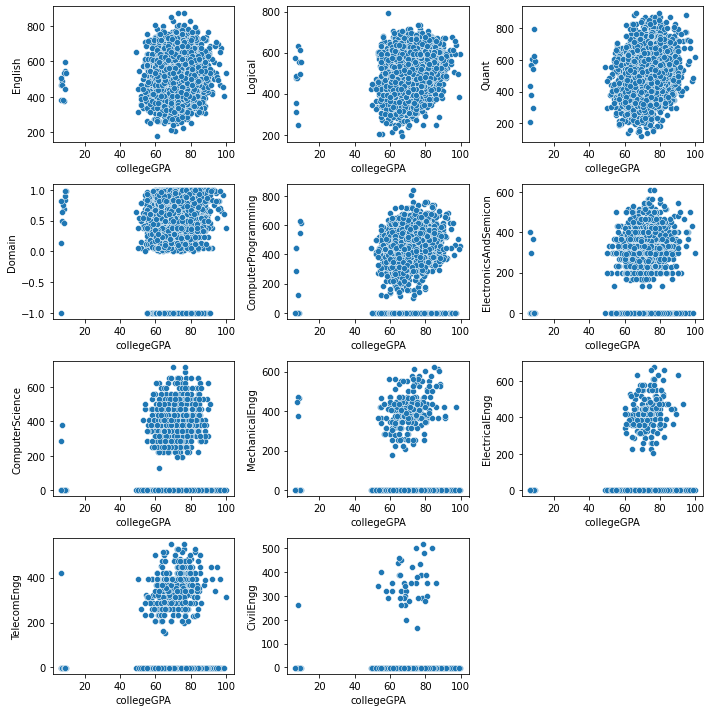

In [38]:
count=1
plt.subplots(figsize=(10, 10))
for i in subjects:
    plt.subplot(4,3,count)
    sns.scatterplot(x="collegeGPA",y=i,data=data)
    count+=1
plt.tight_layout()        
plt.show()

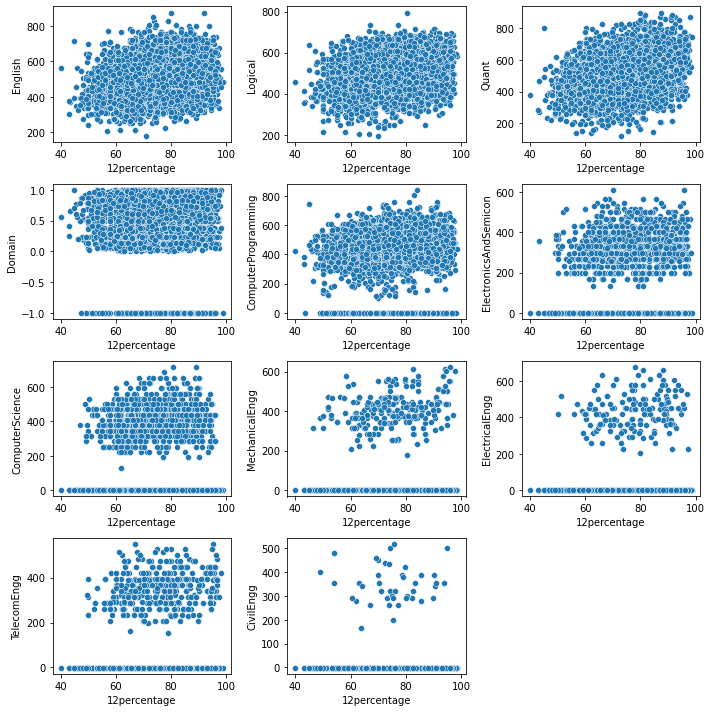

In [39]:
count=1
plt.subplots(figsize=(10, 10))
for i in subjects:
    plt.subplot(4,3,count)
    sns.scatterplot(x="12percentage",y=i,data=data)
    count+=1
plt.tight_layout()        
plt.show()

In [40]:
numerical_col

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

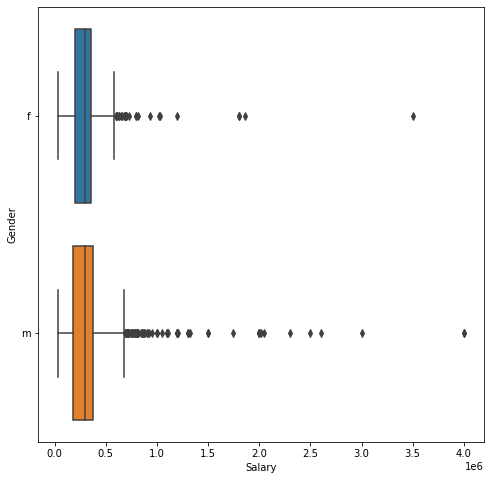

In [41]:
boxplot2('Salary','Gender')

In [42]:
plt.figure(figsize=(55,55), dpi=80)
data.iplot(kind='bar',x='Gender',y='Salary')


<Figure size 4400x4400 with 0 Axes>

Text(0, 0.5, 'Salary')

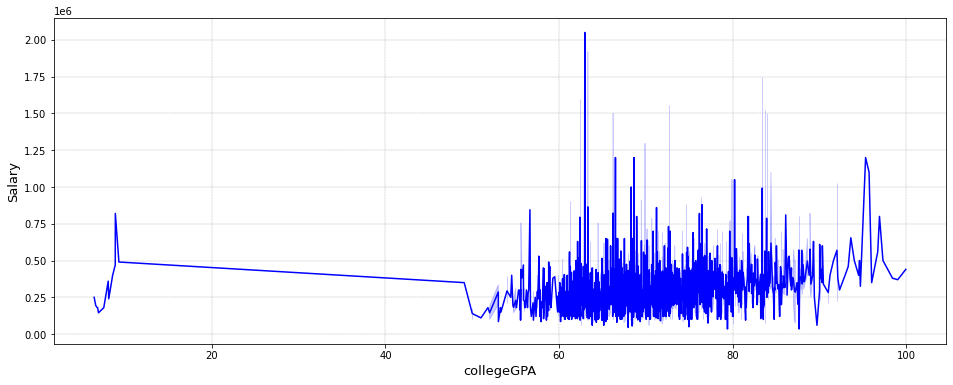

In [43]:
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x=data['collegeGPA'],y=data['Salary'], color='b')
plt.grid(color='gray', linestyle='--', linewidth=0.3)

plt.xlabel("collegeGPA", fontsize=13)
plt.ylabel("Salary",fontsize=13)


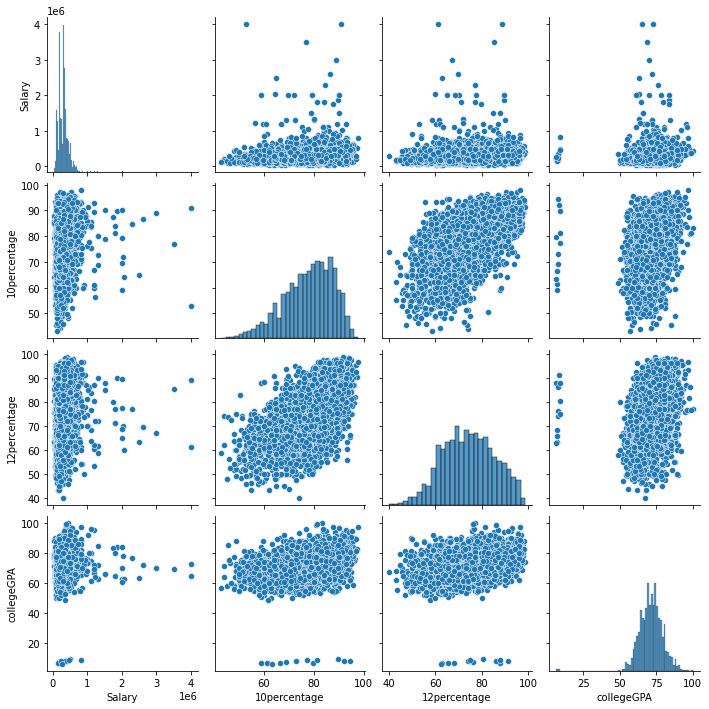

In [44]:
sns.pairplot(numericdata[['Salary','10percentage','12percentage','collegeGPA']])

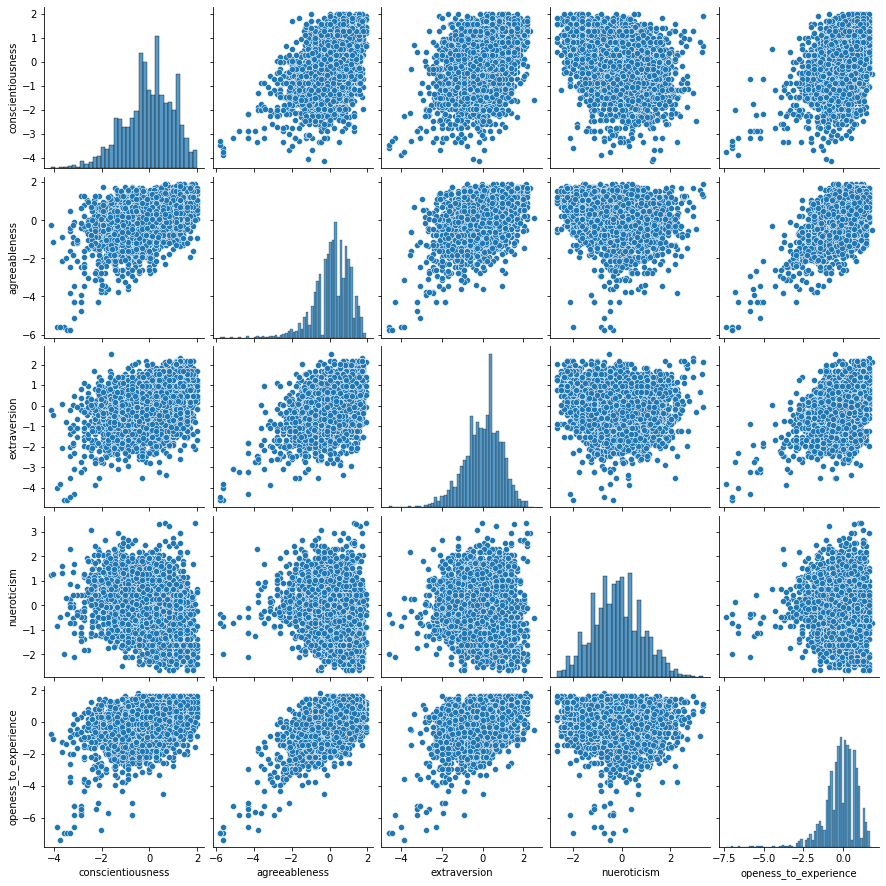

In [45]:
sns.pairplot(numericdata[['conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']])

### CORRELATION

Text(0.5, 1.0, 'Multi-Collinearity of Attributes')

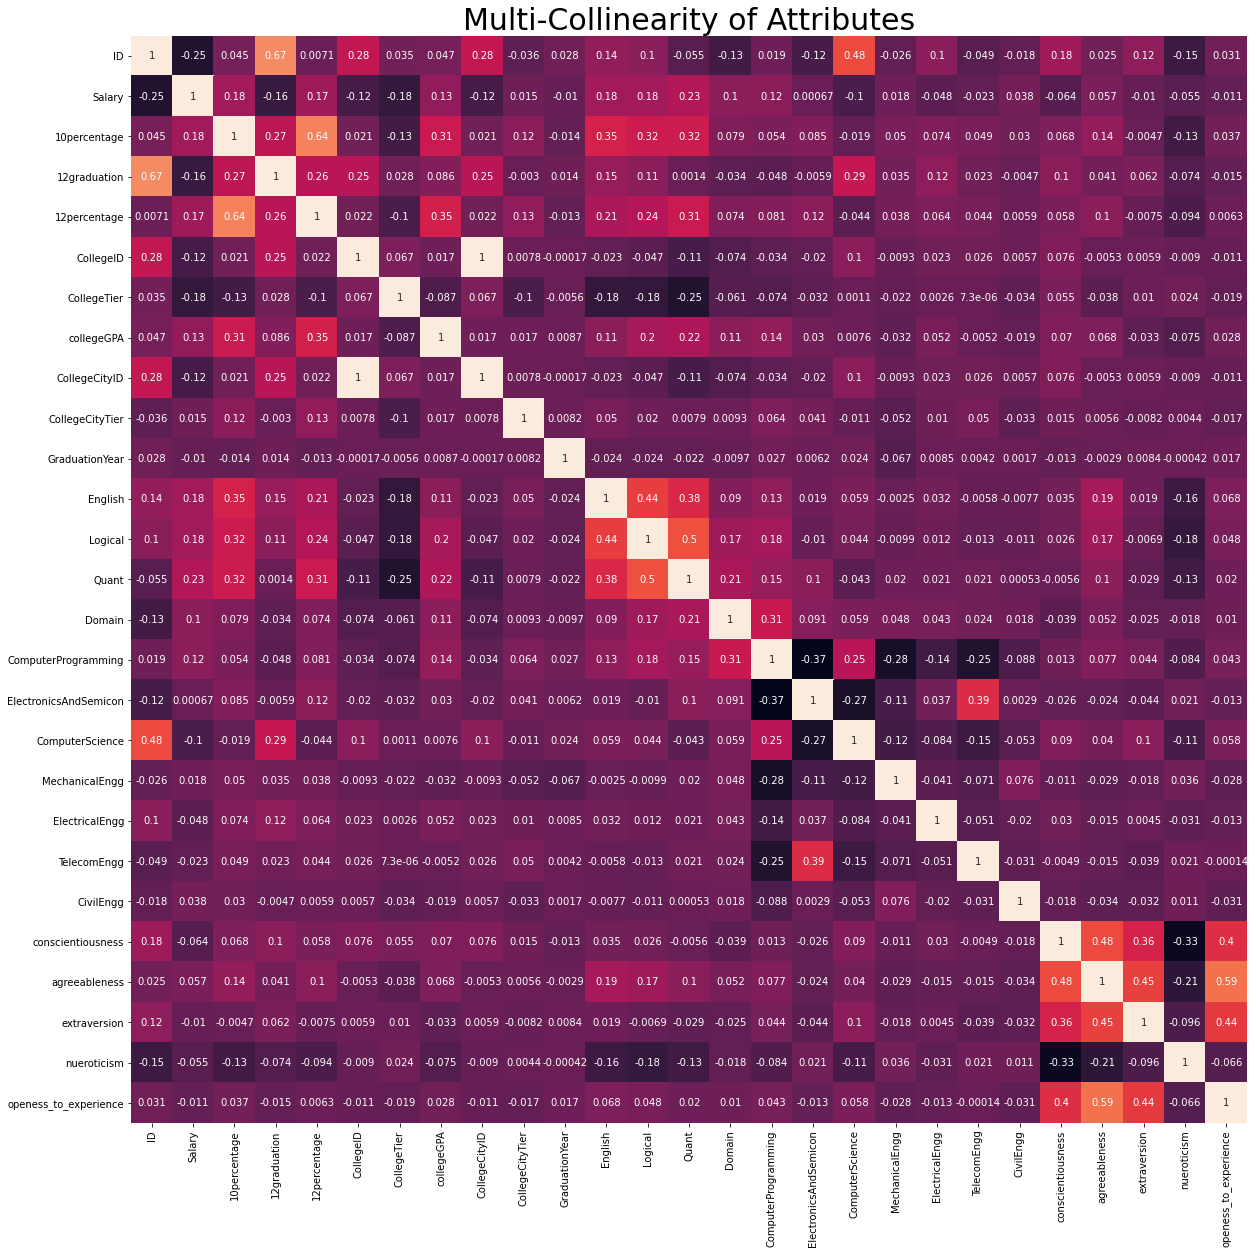

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(numericdata.corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('Multi-Collinearity of Attributes', fontsize=30)

Text(0.5, 1.0, 'Multi-Collinearity of Attributes')

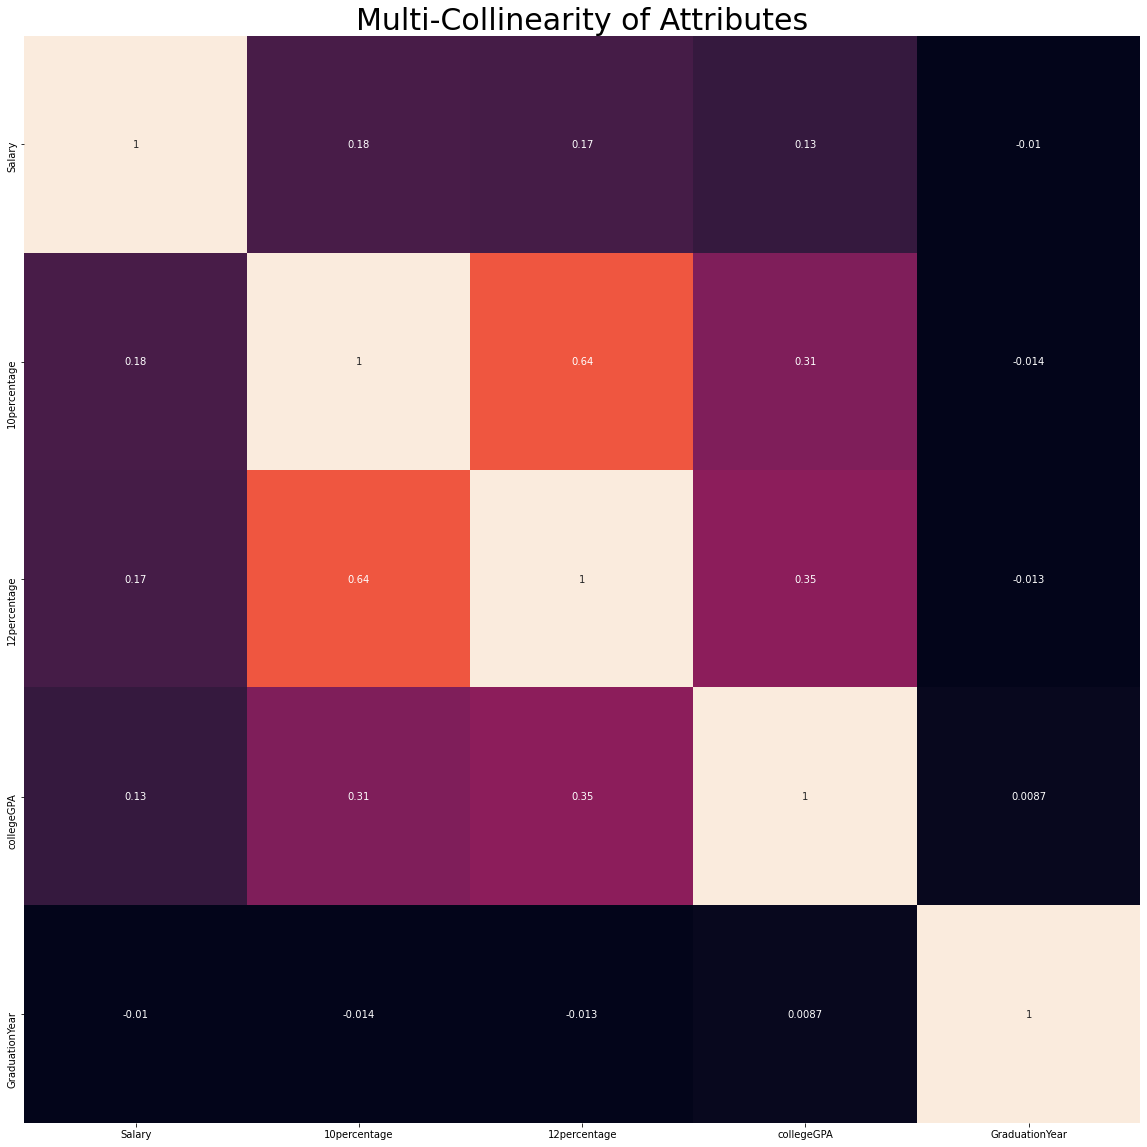

In [47]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(numericdata[['Salary', '10percentage', '12percentage','collegeGPA','GraduationYear']].corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('Multi-Collinearity of Attributes', fontsize=30)

Text(0.5, 1.0, 'Multi-Collinearity of Attributes')

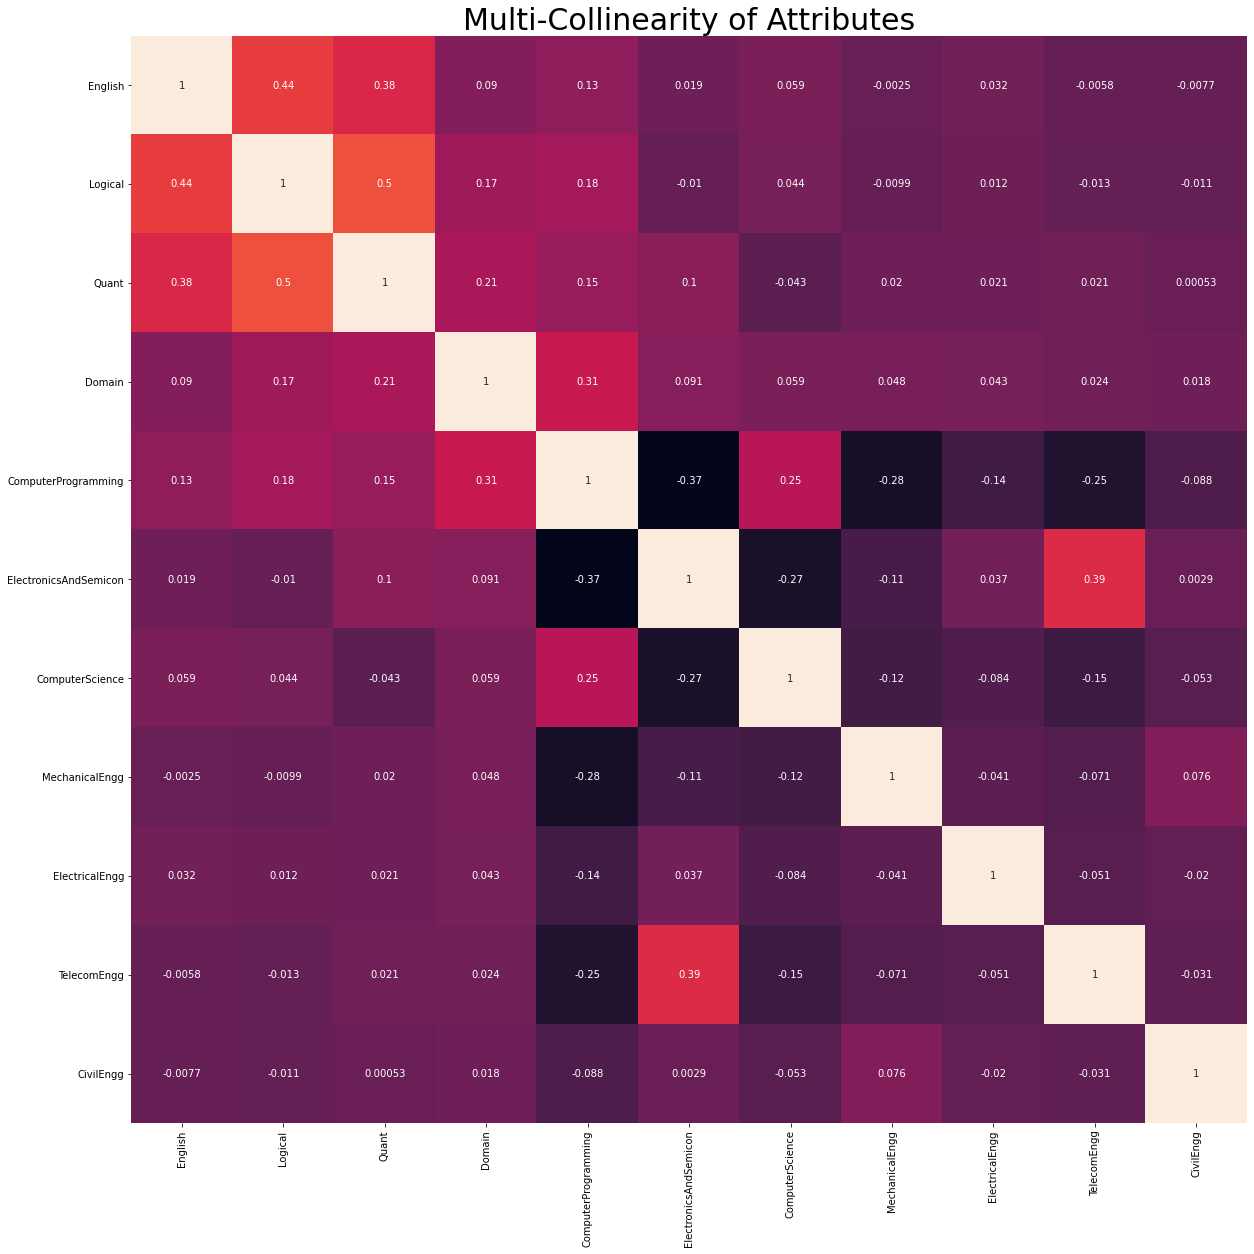

In [48]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(numericdata[['English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg']].corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('Multi-Collinearity of Attributes', fontsize=30)

Text(0.5, 1.0, 'Multi-Collinearity of Attributes')

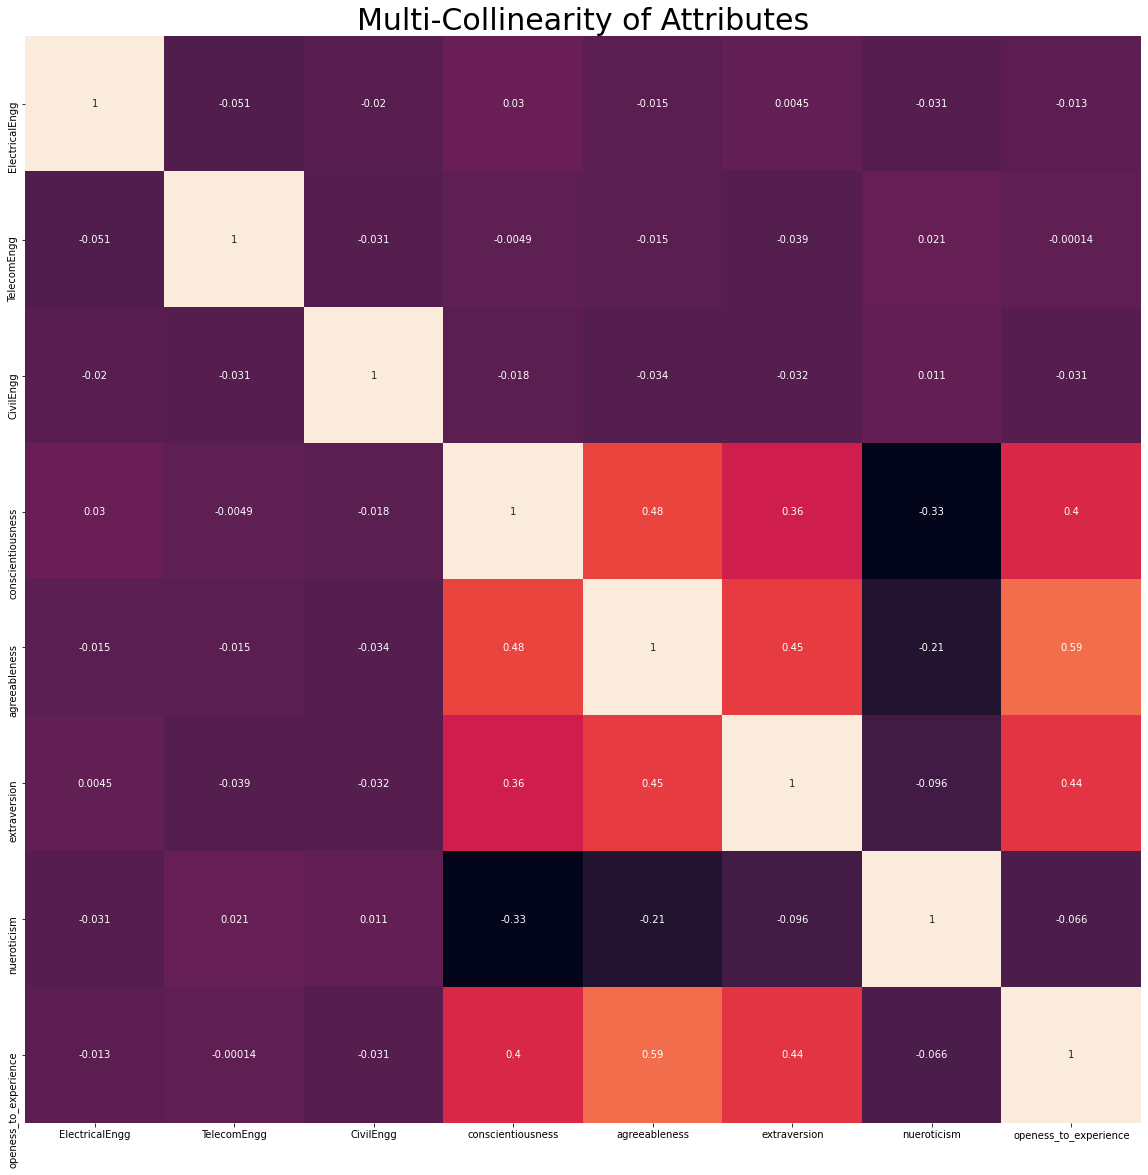

In [49]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(numericdata[['ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']].corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('Multi-Collinearity of Attributes', fontsize=30)

# OBSERVATIONS BASED ON SCORES OF SUBJECTS

In [118]:
obsub=['English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']



In [124]:
for x in obsub:
    print("The number of students with highest marks in {} are {} and the score is {}".format(x,len(data[data[x]==max(data[x])][x]),data[data[x]==max(data[x])][x].unique()))

The number of students with highest marks in English are 1 and the score is [875]
The number of students with highest marks in Logical are 1 and the score is [795]
The number of students with highest marks in Quant are 2 and the score is [900]
The number of students with highest marks in Domain are 2 and the score is [0.99991041]
The number of students with highest marks in ComputerProgramming are 1 and the score is [840]
The number of students with highest marks in ElectronicsAndSemicon are 2 and the score is [612]
The number of students with highest marks in ComputerScience are 2 and the score is [715]
The number of students with highest marks in MechanicalEngg are 1 and the score is [623]
The number of students with highest marks in ElectricalEngg are 1 and the score is [676]
The number of students with highest marks in TelecomEngg are 2 and the score is [548]
The number of students with highest marks in CivilEngg are 1 and the score is [516]
The number of students with highest mark

# RESEARCH QUESTIONS

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 

In [131]:
jobs=['programmer analyst', 'software engineer', 'hardware engineer','associate engineer']

In [132]:
Reqdata=data[data['Specialization'].isin(['computer science & engineering'])]

In [133]:
Reqdata['Specialization'].unique()

array(['computer science & engineering'], dtype=object)

In [134]:
Reqdata.shape

(744, 39)

In [135]:
Reqdata.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
6,train,947847,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
18,train,711342,120000,2014-01-01,2014-06-01 00:00:00,data entry operator,Gurgaon,m,1992-12-07,65.00,...,-1,-1,-1,-1,-1,-0.1590,0.3789,1.3933,-0.2344,1.4386
24,train,963123,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692
25,train,350211,435000,2012-09-01,present,systems analyst,Gurgaon,f,1991-03-02,86.80,...,438,-1,-1,-1,-1,0.0464,1.2028,-0.9245,0.5323,-0.2875
31,train,1094324,340000,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,m,1992-10-23,77.20,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.5021,0.2889


In [136]:
salary_col=Reqdata['Salary'][Reqdata['Designation'].isin(jobs)]

In [137]:
len(salary_col)

167

In [138]:
salary_col

24      335000
31      340000
48      390000
52      400000
55      250000
         ...  
3917    105000
3939    100000
3959    390000
3981    220000
3989    300000
Name: Salary, Length: 167, dtype: int64

### Hypothesis testing

<b>Q-1: Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” </b>


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu < 3 lakhs\  $$
Null Hypothesis (Status Quo): $$ H_0: \mu\geq 3 lakhs $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1:  tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [143]:
sample=random.choice(list(salary_col))

In [ ]:
sample